# 机器学习工程师纳米学位
## 深度学习
## 项目：搭建一个数字识别项目

在此文件中，我们提供给你了一个模板，以便于你根据项目的要求一步步实现要求的功能，进而完成整个项目。如果你认为需要导入另外的一些代码，请确保你正确导入了他们，并且包含在你的提交文件中。以**'练习'**开始的标题表示接下来你将开始实现你的项目。注意有一些练习是可选的，并且用**'可选'**标记出来了。

在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以'练习'开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。

>**注意：** Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 连接 mnist 的字符来合成数据

你可以通过连接[MNIST](http://yann.lecun.com/exdb/mnist/)的字符来合成数据来训练这个模型。为了快速导入数据集，我们可以使用 [Keras Datasets](https://keras.io/datasets/#mnist-database-of-handwritten-digits) [中文文档](http://keras-cn.readthedocs.io/en/latest/other/datasets/#mnist)。

### 载入 mnist

In [2]:
from keras.datasets import mnist

(X_raw, y_raw), (X_raw_test, y_raw_test) = mnist.load_data()

n_train, n_test = X_raw.shape[0], X_raw_test.shape[0]

### 可视化 mnist

我们可以通过 matplotlib 来可视化我们的原始数据集。

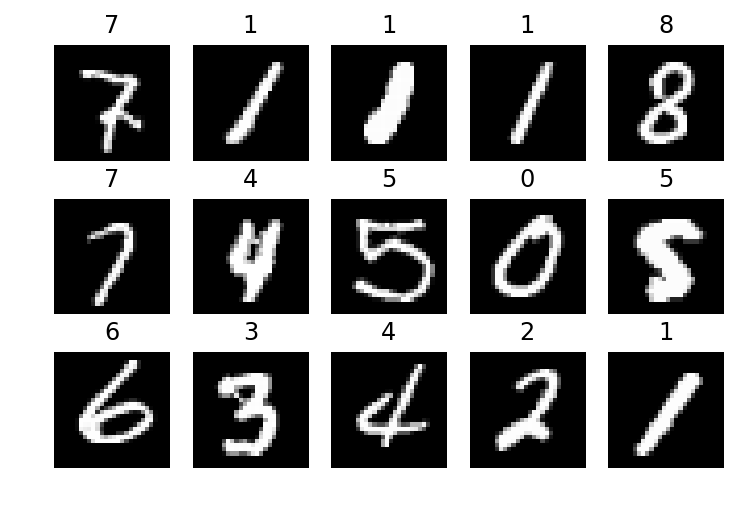

In [3]:
import matplotlib.pyplot as plt
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

for i in range(15):
    plt.subplot(3, 5, i+1)
    index = random.randint(0, n_train-1)
    plt.title(str(y_raw[index]))
    plt.imshow(X_raw[index], cmap='gray')
    plt.axis('off')

### 练习：合成数据

你需要随机取随机张图片，然后将它们拼接成新的图片。

你需要设置20%的数据作为验证集，以保证模型没有过拟合。

In [64]:
import numpy as np
from sklearn.model_selection import train_test_split

n_class, n_len, width, height = 11, 5, 28, 28

def generate_dataset(X, y):
    X_len = X.shape[0]
    X_gen = np.zeros((X_len, height, width*n_len, 1), dtype=np.uint8)
    y_gen = [np.zeros((X_len, n_class), dtype=np.uint8) for i in range(n_len)]
    # TODO: 随机取1~5个数字，并拼接成新的图片
    for i in range(X_len):
        rand_len = random.randint(1, 5)
        lis = list()
        for j in range(0, rand_len):
            index = random.randint(0, X_len - 1)
            # 将对应的y置1
            y_gen[j][i][y[index]] = 1
            lis.append(X[index].T)
        # 其余位取空白    
        for m in range(rand_len, 5):
            # 将对应的y置1
            y_gen[m][i][10] = 1
            lis.append(np.zeros((28, 28),dtype=np.uint8))
        lis = np.array(lis).reshape(140,28).T
     
        X_gen[i] = lis.reshape(28,140,1)
        
    return X_gen, y_gen
X_raw_train, X_raw_valid, y_raw_train, y_raw_valid = train_test_split(X_raw, y_raw, test_size=0.2, random_state=50)

X_train, y_train = generate_dataset(X_raw_train, y_raw_train)
X_valid, y_valid = generate_dataset(X_raw_valid, y_raw_valid)
X_test, y_test = generate_dataset(X_raw_test, y_raw_test)

### 问题 1
_你是如何合成数据集的？为什么要分训练集，验证集和测试集？_

**回答：**
- **设定一个list长度为5，随机取n个数为有数字的类型，其余数字为空白，标记为第11类（编号为10），实现了左对齐的需求。根据Reviewer的提示，lis的每个数是原矩阵的转置，拼成一个140*28的矩阵后整体转置，作为X_gen的第i个数，直接赋给X_gen[i]，运行识别原来快些，lis想不出怎么去除了，似乎还得append。**

- **训练集是用来训练模型的，验证集是用来对训练的模型进行进一步调参优化，如果使用测试集验证，网络就会记住测试集，容易使模型过拟合，测试集用来测试模型表现。**


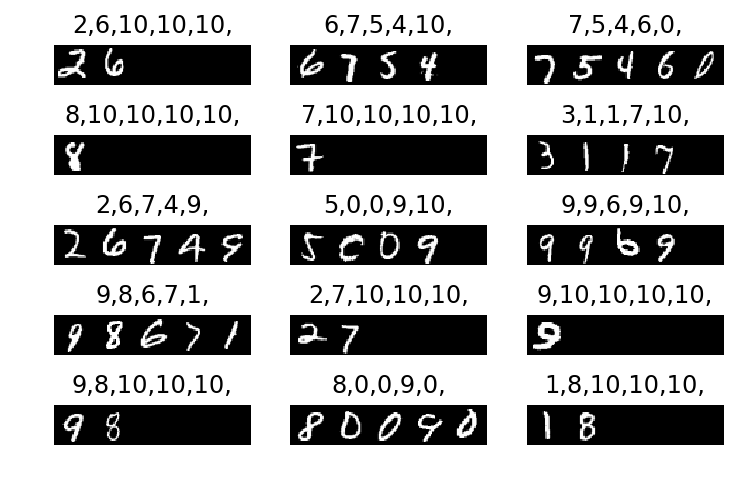

In [65]:
# 显示生成的图片
for i in range(15):
    plt.subplot(5, 3, i+1)
    index = random.randint(0, n_test-1)
    title = ''
    for j in range(n_len):
        title += str(np.argmax(y_test[j][index])) + ','
    
    plt.title(title)
    plt.imshow(X_test[index][:,:,0], cmap='gray')
    plt.axis('off')

### 练习：设计并测试一个模型架构

设计并实现一个能够识别数字序列的深度学习模型。为了产生用于测试的合成数字序列，你可以进行如下的设置：比如，你可以限制一个数据序列最多五个数字，并在你的深度网络上使用五个分类器。同时，你有必要准备一个额外的“空白”的字符，以处理相对较短的数字序列。

在思考这个问题的时候有很多方面可以考虑：

- 你的模型可以基于深度神经网络或者是卷积神经网络。
- 你可以尝试是否在每个分类器间共享权值。
- 你还可以在深度神经网络中使用循环网络来替换其中的分类层，并且将数字序列里的数字一个一个地输出。

在使用 Keras 搭建模型的时候，你可以使用 [函数式模型 API](http://keras-cn.readthedocs.io/en/latest/models/model/) 的方式来搭建多输出模型。

In [79]:
from keras.models import Model
from keras.layers import *
import tensorflow as tf

# This returns a tensor
inputs = Input(shape=(28, 140, 1))

conv_11 = Conv2D(filters= 32, kernel_size=(5,5), padding='Same', activation='relu')(inputs)
max_pool_11 = MaxPool2D(pool_size=(2,2))(conv_11)
conv_12 = Conv2D(filters= 10, kernel_size=(3,3), padding='Same', activation='relu')(max_pool_11)
max_pool_12 = MaxPool2D(pool_size=(2,2), strides=(2,2))(conv_12)
flatten11 = Flatten()(max_pool_12)
hidden11 = Dense(15, activation='relu')(flatten11)
prediction1 = Dense(11, activation='softmax')(hidden11)

# conv_21 = Conv2D(filters= 32, kernel_size=(5,5), padding='Same', activation='relu')(inputs)
# max_pool_21 = MaxPool2D(pool_size=(2,2))(conv_21)
# conv_22 = Conv2D(filters= 10, kernel_size=(3,3), padding='Same', activation='relu')(max_pool_21)
# max_pool_22 = MaxPool2D(pool_size=(2,2), strides=(2,2))(conv_22)
# flatten21 = Flatten()(max_pool_22)
hidden21 = Dense(15, activation='relu')(flatten11)
prediction2 = Dense(11, activation='softmax')(hidden21)

# conv_31 = Conv2D(filters= 32, kernel_size=(5,5), padding='Same', activation='relu')(inputs)
# max_pool_31 = MaxPool2D(pool_size=(2,2))(conv_31)
# conv_32 = Conv2D(filters= 10, kernel_size=(3,3), padding='Same', activation='relu')(max_pool_31)
# max_pool_32 = MaxPool2D(pool_size=(2,2), strides=(2,2))(conv_32)
# flatten31 = Flatten()(max_pool_32)
hidden31 = Dense(15, activation='relu')(flatten11)
prediction3 = Dense(11, activation='softmax')(hidden31)

# conv_41 = Conv2D(filters= 32, kernel_size=(5,5), padding='Same', activation='relu')(inputs)
# max_pool_41 = MaxPool2D(pool_size=(2,2))(conv_41)
# conv_42 = Conv2D(filters= 10, kernel_size=(3,3), padding='Same', activation='relu')(max_pool_41)
# max_pool_42 = MaxPool2D(pool_size=(2,2), strides=(2,2))(conv_42)
# flatten41 = Flatten()(max_pool_42)
hidden41 = Dense(15, activation='relu')(flatten11)
prediction4 = Dense(11, activation='softmax')(hidden41)

# conv_51 = Conv2D(filters= 32, kernel_size=(5,5), padding='Same', activation='relu')(inputs)
# max_pool_51 = MaxPool2D(pool_size=(2,2))(conv_51)
# conv_52 = Conv2D(filters= 10, kernel_size=(3,3), padding='Same', activation='relu')(max_pool_51)
# max_pool_52 = MaxPool2D(pool_size=(2,2), strides=(2,2))(conv_52)
# flatten51 = Flatten()(max_pool_52)
hidden51 = Dense(15, activation='relu')(flatten11)
prediction5 = Dense(11, activation='softmax')(hidden51)

model = Model(inputs=inputs, outputs=[prediction1,prediction2,prediction3,prediction4,prediction5])
# model = Model(inputs=inputs, outputs=prediction1)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 问题 2
_你为解决这个问题采取了什么技术？请详细介绍你使用的技术。_

**回答：使用了卷积神经网络。卷积神经网络虽然运行慢，但是在识别图像中表现很好，因为它可以用到相邻像素间的信息，这是深度学习网络忽略掉的信息。卷积神经网络的原理是通过卷积核在图片上做卷积，学习得到特征，最底层是简单的线条，之后图形逐层复杂，多个卷积核在图片上做卷积，可以增加输出节点的深度，越深，携带的信息越多，当然，也要根据不同的情况进行调参，比如调整学习率、卷积核、stride、激活函数、损失函数、迭代次数、是否dropout等等。** 

**补充：**

**Softmax：对于多分类问题，softmax函数可以得到各个分类的概率值。**

**Activation function：激活函数是为了给网络加入非线性因素，如果没有激活函数，网络就是一个线性分类器，y=wx+b，如果这个y值通过了激活函数，结果就不是线性的了。这里用了relu激活函数， f(x)=max(0,x)，优点是得到的SGD的收敛速度会比 sigmoid快很多，相比于 sigmoid/tanh需要计算指数等，计算复杂度高，ReLU 只需要一个阈值就可以得到激活值，缺点是ReLU在训练的时候很”脆弱”，一不小心有可能导致神经元”坏死”，优缺点摘自[几种常见的激活函数](http://blog.csdn.net/u014365862/article/details/52710698)**

**dropout：为了避免大型深度网络过拟合，会在训练时使用dropout来丢掉一些神经元，这样做可以提高模型的表现。**

**rmsprop：一种寻找损失函数最小值的优化方法。[优化方法总结](http://blog.csdn.net/u010089444/article/details/76725843)中提到RMSprop是Geoff Hinton提出的一种自适应学习率方法。Adagrad会累加之前所有的梯度平方，而RMSprop仅仅是计算对应的平均值，因此可缓解Adagrad算法学习率下降较快的问题。 **

**categorical_crossentropy：一种损失函数，也成多类对数损失，使用该目标函数时，需要将标签转化为形如(nb_samples, nb_classes)的二值序列，摘自[keras学习笔记03——常见重要模块](http://blog.csdn.net/xiaozhuge080/article/details/52688613)**

### 可视化你的网络模型

参考链接：[可视化visualization](http://keras-cn.readthedocs.io/en/latest/other/visualization/)

可以是保存成 PNG 格式显示，也可以直接使用 SVG 格式。 SVG 是矢量图，它的优点是可以无限放大。

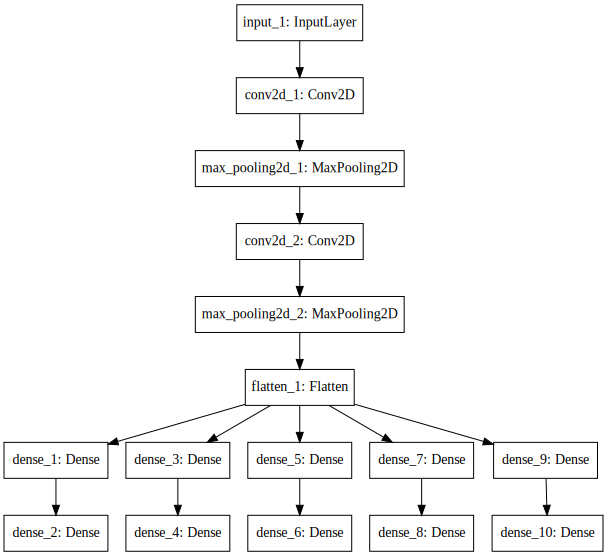

In [80]:
from keras.utils.vis_utils import plot_model, model_to_dot
from IPython.display import Image, SVG

# TODO: 可视化你的模型

SVG(model_to_dot(model).create(prog='dot', format='svg'))

### 问题 3
_你最终的模型架构是什么样的？（什么类型的模型，层数，大小, 如何连接等）_

**回答：使用了卷积神经网络的经典模型，一共6层，卷积层（卷积核5*5，激活函数relu，padding是Same，32个卷积核）->最大池化层（2*2）->卷积层（3*3，relu，Same，10）->最大池化层（2*2，strde2*2）->flatten->hidden（15）），本来应该还有一个隐藏层，但是发现没有表现也很好，为了运行速度，所以就去掉了。五个分类器从过了卷积层开始，因为经过无数次试验，不用从一开始input就分成5个，可以用卷积层学到特征，然后最后深度学习网络分成五个去识别。**

- ** 这里是疑问：**
开始受笔记本电脑性能限制，没用gpu，训练上述一模一样的网络，每个分类器的accuracy是0.1，所以我又不断调整参数以及网络结构，正确率都是0.1左右，而我换成gpu，为什么performance会好？还有依然是cpu上试验，我换成上述代码中取消注释后的网络结构，即从inputs就开始分成5个分类器的网络后，只有1个accuracy是0.9+，其他都是0.1以下，这是为什么？感觉就像一样的老师一样的东西，只有一个学生聪明，其他都是傻子。然后我又换成只有1个分类器，识别第一位，accuracy是0.9+，识别其他位正确率也很高，只要是单独识别一位就好，这是为什么？难道5个独立的分类器一起训练会互相干扰？所有cpu失败的网络在gpu上一跑，performance都特别好，感觉花了好几天时间调调网络结构，不如换一块gpu……

### 练习：训练你的网络模型

训练你的模型时，需要设置训练集和验证集。

In [81]:
from keras.callbacks import ReduceLROnPlateau
# TODO: 训练你的模型
learnrate_reduce_1 = ReduceLROnPlateau(monitor='val_dense_2_acc', patience=2, verbose=1,factor=0.8, min_lr=0.00001)
learnrate_reduce_2 = ReduceLROnPlateau(monitor='val_dense_4_acc', patience=2, verbose=1,factor=0.8, min_lr=0.00001)
learnrate_reduce_3 = ReduceLROnPlateau(monitor='val_dense_6_acc', patience=2, verbose=1,factor=0.8, min_lr=0.00001)
learnrate_reduce_4 = ReduceLROnPlateau(monitor='val_dense_8_acc', patience=2, verbose=1,factor=0.8, min_lr=0.00001)
learnrate_reduce_5 = ReduceLROnPlateau(monitor='val_dense_10_acc', patience=2, verbose=1,factor=0.8, min_lr=0.00001)

model.fit(X_train, y_train, epochs=20, batch_size=128,
          validation_data=(X_valid, y_valid), 
         callbacks=[learnrate_reduce_1,learnrate_reduce_2,learnrate_reduce_3,learnrate_reduce_4,learnrate_reduce_5])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 75s 2ms/step - loss: 3.0085 - dense_2_loss: 0.7074 - dense_4_loss: 0.6174 - dense_6_loss: 0.6227 - dense_8_loss: 0.6636 - dense_10_loss: 0.3974 - dense_2_acc: 0.7811 - dense_4_acc: 0.8122 - dense_6_acc: 0.7990 - dense_8_acc: 0.7944 - dense_10_acc: 0.8780 - val_loss: 0.8781 - val_dense_2_loss: 0.1946 - val_dense_4_loss: 0.1816 - val_dense_6_loss: 0.1658 - val_dense_8_loss: 0.2342 - val_dense_10_loss: 0.1019 - val_dense_2_acc: 0.9438 - val_dense_4_acc: 0.9487 - val_dense_6_acc: 0.9503 - val_dense_8_acc: 0.9243 - val_dense_10_acc: 0.9692
Epoch 2/20
48000/48000 [==============================] - 64s 1ms/step - loss: 0.4907 - dense_2_loss: 0.1198 - dense_4_loss: 0.1002 - dense_6_loss: 0.0932 - dense_8_loss: 0.1189 - dense_10_loss: 0.0585 - dense_2_acc: 0.9636 - dense_4_acc: 0.9701 - dense_6_acc: 0.9725 - dense_8_acc: 0.9639 - dense_10_acc: 0.9832 - val_loss: 0.4343 - val_dense_2_loss:

Epoch 14/20
48000/48000 [==============================] - 64s 1ms/step - loss: 0.0094 - dense_2_loss: 0.0035 - dense_4_loss: 0.0027 - dense_6_loss: 0.0010 - dense_8_loss: 0.0020 - dense_10_loss: 1.7758e-04 - dense_2_acc: 0.9991 - dense_4_acc: 0.9995 - dense_6_acc: 0.9998 - dense_8_acc: 0.9996 - dense_10_acc: 0.9999 - val_loss: 0.6053 - val_dense_2_loss: 0.1921 - val_dense_4_loss: 0.1621 - val_dense_6_loss: 0.1125 - val_dense_8_loss: 0.0763 - val_dense_10_loss: 0.0623 - val_dense_2_acc: 0.9773 - val_dense_4_acc: 0.9811 - val_dense_6_acc: 0.9863 - val_dense_8_acc: 0.9895 - val_dense_10_acc: 0.9933
Epoch 15/20
47872/48000 [============================>.] - ETA: 0s - loss: 0.0063 - dense_2_loss: 0.0020 - dense_4_loss: 0.0020 - dense_6_loss: 8.5372e-04 - dense_8_loss: 0.0014 - dense_10_loss: 3.8120e-05 - dense_2_acc: 0.9996 - dense_4_acc: 0.9996 - dense_6_acc: 0.9999 - dense_8_acc: 0.9997 - dense_10_acc: 1.0000
Epoch 00015: ReduceLROnPlateau reducing learning rate to 0.00040960004553198815

### 练习：计算你的模型准确率

我们刚才得到了模型每个数字的准确率，现在让我们来计算整体准确率，按照完全预测正确数字序列的标准来计算。

比如 1,2,3,10,10 预测成了 1,2,10,10,10 算错，而不是算对了80%。

In [132]:
def evaluate(model):
    # TODO: 按照错一个就算错的规则计算准确率.
    right = 0
    total = len(X_test)
    result = model.predict(X_test)

    for i in range(total):
        if str(np.argmax(result[0][i])) == str(np.argmax(y_test[0][i])) \
                and str(np.argmax(result[1][i])) == str(np.argmax(y_test[1][i])) \
                and str(np.argmax(result[2][i])) == str(np.argmax(y_test[2][i])) \
                and str(np.argmax(result[3][i])) == str(np.argmax(y_test[3][i])) \
                and str(np.argmax(result[4][i])) == str(np.argmax(y_test[4][i])):
            right += 1
    return right / total
    
evaluate(model)

0.9476

### 问题 4

_你的模型准确率有多少？你觉得你的模型足以解决问题吗？_

**回答：0.9476, 我觉得模型可以解决问题。**

### 预测值可视化

我们将模型的预测结果和真实值画出来，观察真实效果。

(-0.5, 139.5, 27.5, -0.5)

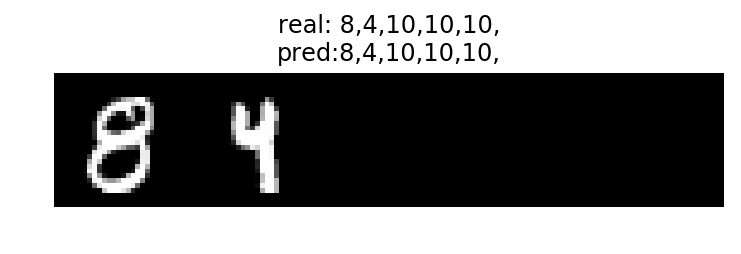

In [134]:
def get_result(result):
    # 将 one_hot 编码解码
    resultstr = ''
    for i in range(n_len):
        resultstr += str(np.argmax(result[i])) + ','
    return resultstr

index = random.randint(0, n_test-1)
y_pred = model.predict(X_test[index].reshape(1,28,140,1))

plt.title('real: %s\npred:%s'%(get_result([y_test[x][index] for x in range(n_len)]), get_result(y_pred)))
plt.imshow(X_test[index,:,:,0], cmap='gray')
plt.axis('off')

### 保存模型

模型达到满意的效果以后，我们需要保存模型，以便下次调用。

读取的方式也很简单：`model = load_model('model.h5')`

In [135]:
model.save('model.h5')